# Introduction 😃😃😃😃

### Wine Quality DataSet

- This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.

### This data frame contains the following columns:
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10- sulphates
- 11 - alcohol 
- 12 - quality

 
# Work plan  😃😃😃

- Analyze and explore data
- Building a Machine Learning Model


# 1- Analyze and explore data  😃😃😃

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset

df=pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

In [3]:
# looking the data set 💥💥💥

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
 #print the shape dataset
    
print("Shape The DataSet ", df.shape )

Shape The DataSet  (1143, 13)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#checking null value 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

-  No missing value  😊😊😊😊😊

In [7]:
# Describe value data set 🎉🎉
df.describe().round(2) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


In [8]:
# Drop columns ID , because we don't need it.

df.drop(columns="Id",inplace=True)


#the unique quality 

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


<AxesSubplot:>

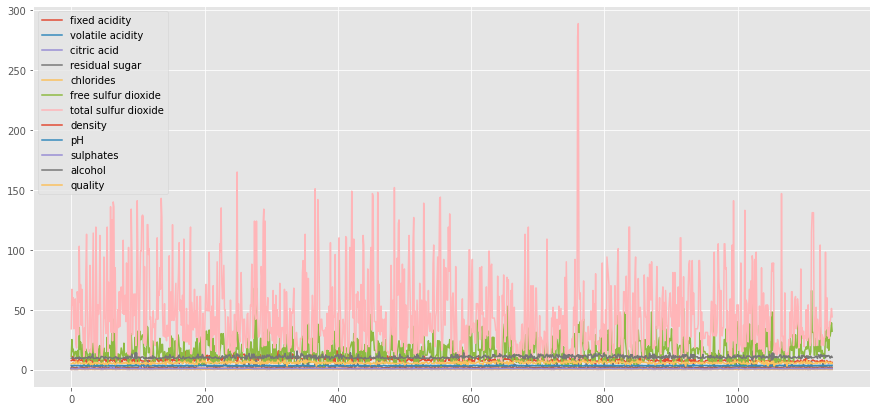

In [9]:
#graph all the data set - just for looking
df.plot(figsize=(15,7))

In [10]:
# making Group by ❤️❤️❤️❤️

ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<AxesSubplot:xlabel='quality'>

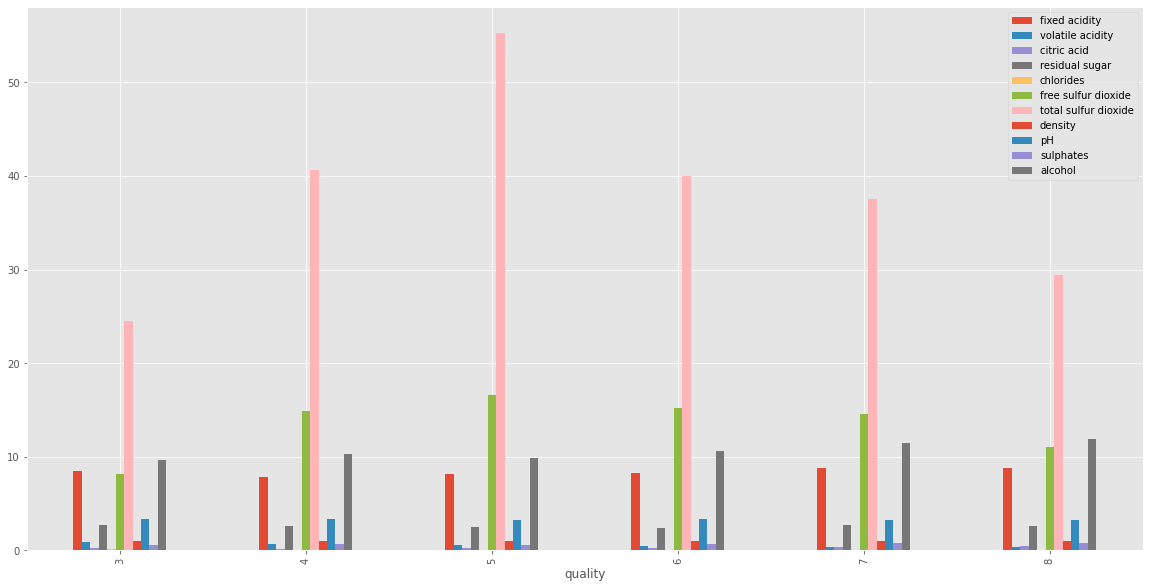

In [11]:
# graph the group by ❤️❤️❤️❤️

ave_qu.plot(kind="bar",figsize=(20,10))

- now we see  the effect of the elements on the quality   🎉🎉🎉🎉

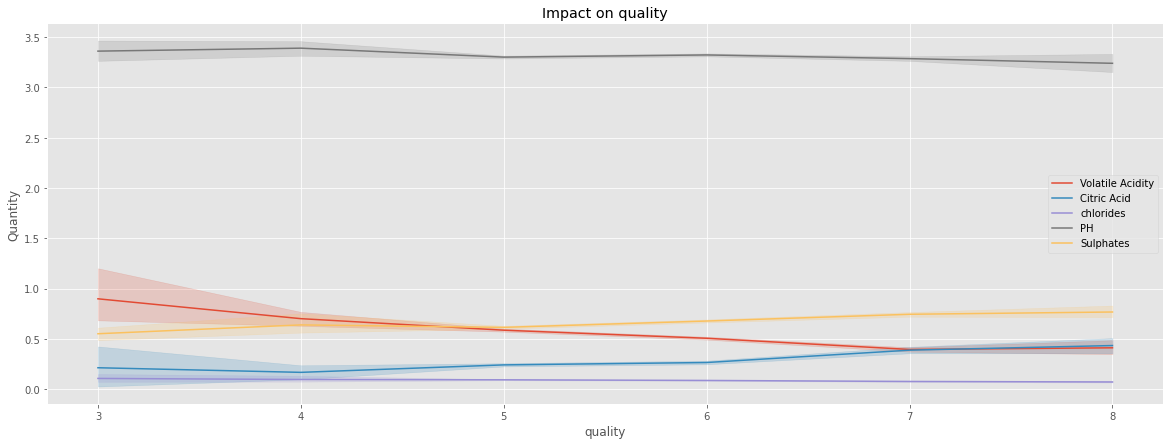

In [12]:
# let see effect some of elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

- We see no high effect this elements on the quality 😃😃😃😃

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

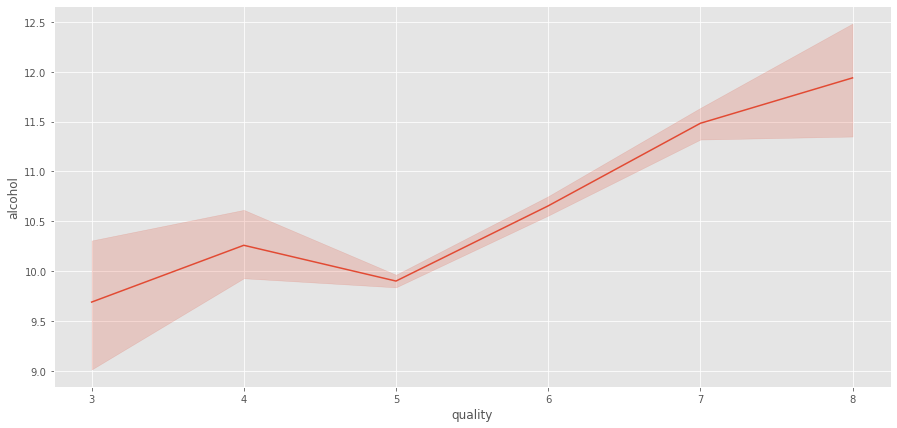

In [13]:
# effect the Alcohol in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

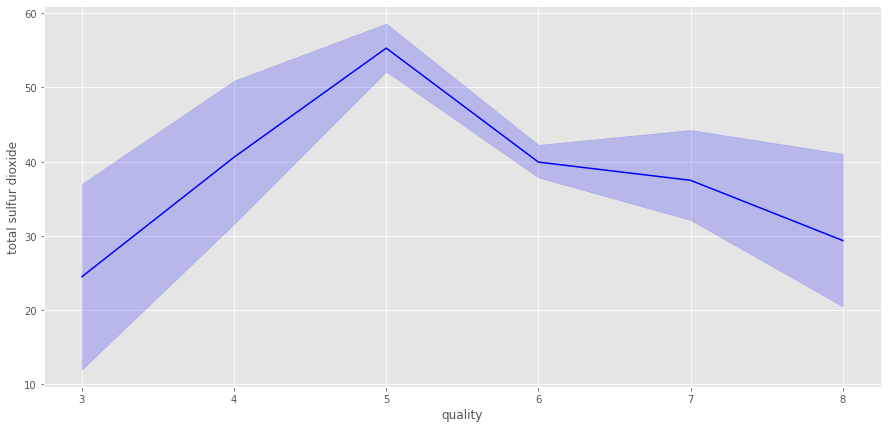

In [14]:
# effect the total sulfur dioxide in the quality
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

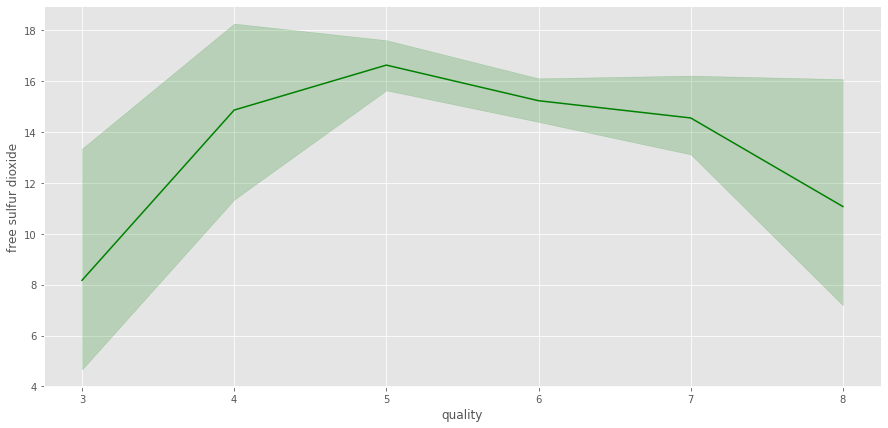

In [15]:
# effect the free sulfur dioxide in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [16]:
# using graph interactive the show the effect free and total - sulfur dioxide in the quality

px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

# Analysis Results 🙈🙉🙊

## We have 5 types of quality in DataSet - 3 to 8
- The Best quality 8
- The less quality 3
### The elements highest effect on the quality of wine:
- 1 - Alcohol 
- 2 - Free sulfur dioxide
- 3 - Total sulfur dioxide

### The elements lessest or a simple effect on the quality of wine:
- 1 - Fixed acidity
- 2 - Volatile acidity
- 3 - Citric acid
- 4 - Residual sugar
- 5 - Chlorides
- 6 - Density
- 7 - PH
- 8 - Sulphates

## If making wine, please pay attention to these items.




# 2 -Building a Machine Learning Model 😃😃😃😃😃

In [17]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [18]:
#Defined X value and y value , and split the data train

X = df.drop(columns="quality")           
y = df["quality"]    # y = quality

In [19]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


### 1 -linear_model

In [20]:
# using the model LinearRegression
LR_model=LinearRegression()

# fit model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645896
 Model Evaluation Linear R : mean absolute error is  0.4742577332205526
 Model Evaluation Linear R : mean squared  error is  0.37215517566167367
 Model Evaluation Linear R : median absolute error is  0.3771988566534432


In [21]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Model Evaluation Logistic R : mean absolute error is  0.4020979020979021
 Model Evaluation Logistic R : mean squared  error is  0.458041958041958
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6258741258741258


### Decision Tree Classifier

In [22]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9241540256709452
Score the X-test  with Y-test  is :  0.5314685314685315


In [23]:
# Select  Important columns

print("The Important columns \n",Tree_model.feature_importances_)


The Important columns 
 [0.069496   0.13303545 0.06692639 0.07171826 0.08538616 0.07811518
 0.09024489 0.04018572 0.05969526 0.11619673 0.18899996]


In [24]:
df.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


- Note, the feature importances for quality in the DecisionTree , column Alcohol = 19% ,we said in analysis

In [25]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.5314685314685315


### Model SVM

In [26]:
# using the model SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5950991831971996
Score the X-test  with Y-test  is :  0.6433566433566433
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


In [27]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.14069185408666396
Score the X-test  with Y-test  is :  0.23501709956140815
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


### Neighbors model

In [28]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6289381563593932
Score the X-test  with Y-test  is :  0.5314685314685315
 Model Evaluation K Neighbors Classifier : accuracy score  0.5314685314685315


# Model building results 🤕🤕🤕🤕

### These models were selected and evaluated:
### linear_model
- 1- LinearRegression
- Score the X-train with Y-train is : 0.37%
- Score the X-test with Y-test is : 0.34%
- Mean absolute error is 0.47%
- Mean squared error is 0.37%
- Median absolute error is 0.37%

- 2- LogisticRegression

- Score the X-train with Y-train is : 0.58%
- Score the X-test with Y-test is : 0.62%
- Mean absolute error is 0.40%
- Mean squared error is 0.45%
- Median absolute error is 0.0
- Accuracy score 0.625%

### Decision Tree Classifier

- Score the X-train with Y-train is : 0.92%
- Score the X-test with Y-test is : 0.54%
- Accuracy score 0.54%


### Model SVM

- 1- SVC
- Score the X-train with Y-train is : 0.59%
- Score the X-test with Y-test is : 0.64%
- Accuracy score 0.64%

- 2-SVR

- Score the X-train with Y-train is : 0.14%
- Score the X-test with Y-test is : 0.23%
- Accuracy score 0.64%

### Neighbors model

- Score the X-train with Y-train is : 0.62%
- Score the X-test with Y-test is : 0.53%
- Accuracy score 0.53%


# The End 😊😊😊😊

- Thank for reading my analysis , if you any questions or advice me please write in the comment .

# Vote😊😊😊😊😊😊

- If you liked my work vote me 